In [1]:
%load_ext autoreload
%autoreload 2

import os, sys
import matplotlib.pyplot as plt
# import matplotlib.gridspec as gridspec
import matplotlib.transforms as transforms
import numpy as np

PATH_TO_ROOT = '../..'
sys.path.insert(0, os.path.join(PATH_TO_ROOT, 'code', 'src'))
import utils, visualizations, analysis


In [2]:
analysis_dir = os.path.join(PATH_TO_ROOT, 'analysis')

# Paths from dependent variables
categories_path = os.path.join(PATH_TO_ROOT, 'data', 'files', 'category_groupings.json')
factor_categories_path = os.path.join(analysis_dir, 'mental_capacities', 'factor_analysis', 'results', 'fa_groupings.json')
items_path = os.path.join(PATH_TO_ROOT, 'data', 'files', 'mental_capacity_items.txt')

# Labels and colors for graphs
conditions = ['Baseline', 'Mechanistic', 'Functional', 'Intentional']
condition_color_idxs = [7, 1, 2, 4]
save_ext = 'pdf'

# Analysis dirs
categorization_source = 'body-heart-mind'
# R Results from 40-item survey using body-heart-mind, factor analysis, and item level
R_results_save_dir = os.path.join(analysis_dir, 'mental_capacities', categorization_source, 'R', 'results')
factor_R_results_save_dir = os.path.join(analysis_dir, 'mental_capacities', 'factor_analysis', 'results', 'R', 'results')
item_level_R_results_save_dir = os.path.join(analysis_dir, 'mental_capacities', 'item_level')

# Attitudes results
attitudes_R_results_save_dir = os.path.join(analysis_dir, 'attitudes', 'R', 'results')

# Save figure directories
fig_save_dir = os.path.join(analysis_dir, 'figures')
utils.ensure_dir(fig_save_dir)

log_path = os.path.join(fig_save_dir, 'log.txt')
utils.informal_log("Analysis dir: {}".format(analysis_dir), log_path)
utils.informal_log("Fig dir: {}".format(fig_save_dir), log_path)

# # Mental state attribution save dir
# msa_graph_save_dir = os.path.join(PATH_TO_ROOT, fig_save_dir, 'msa_survey')
# utils.ensure_dir(msa_graph_save_dir)


[0426_142756] Analysis dir: ../../analysis
[0426_142756] Fig dir: ../../analysis/figures


### Helper Functions

In [3]:
# # Helper Functions
# def overall_pointplot(r_results_path,
#                       grouping_source,
#                       conditions,
#                       emmeans_graph_save_dir,
#                       condition_color_idxs,
#                       orientation,
#                       marker_size=6,
#                       spacing_multiplier=0.1,
#                       label=True,
#                       show_xlabel=True,
#                       show_ylabel=True,
#                       show_legend=False,
#                       title=None,
#                       fig=None,
#                       ax=None,
#                       font_size_dict={},
#                       save_path=None,
#                       save_ext='pdf',
#                       show=False):
#     '''
#     Plot mean over all 40 mental capacity items
#     '''
#     # Parse EMMeans output from R & pivot data
#     emmeans_graph_data, emmeans_df = analysis.read_emmeans_single_variable(
#         results_path=r_results_path,
#         grouping_source=grouping_source,
#         variable_name='portrayal',
#         variable_values=conditions,
#         save_dir=emmeans_graph_save_dir,
#         overwrite=False)

#     emmeans_df = analysis._format_and_pivot_emmeans_df(
#         emmeans_df=emmeans_df,
#         target_column=None
#     )

#     # Extract means and CI errors
#     means = emmeans_df['mean']
#     means = [[mean] for mean in means]

#     errors = emmeans_df['ci_error'].to_numpy()
#     errors = [[error] for error in errors]

#     # Formatting for horizontal vs vertical graphs (based on direction of error bars)
#     if orientation == 'horizontal':
#         ytick_labels = ['']
#         if show_ylabel:
#             ylabel = 'Overall Item Mean'
#         else:
#             ylabel = None
#         xtick_labels = [i for i in range(1, 8)]
#         if show_xlabel:
#             xlabel = 'Rating (1-7)'
#         else:
#             xlabel=None
#         fig_size = (7, 3)
#     else:
#         xtick_labels = ['Overall']
#         if show_xlabel:
#             if fig is None and ax is None:
#                 xlabel = 'Overall Item Mean'
#             else:
#                 xlabel = 'Overall'
#         else:
#             xlabel = None
#         ytick_labels = [i for i in range(1, 8)]
#         if show_ylabel:
#             ylabel = 'Rating (1-7)'
#         else:
#             ylabel = None
#         fig_size = (2, 4)
#         xlim = (-1, 1)

#     # Label conditions
#     if label:
#         labels = conditions
#     else:
#         labels = None

#     fig, ax = visualizations.pointplot(
#         fig=fig,
#         ax=ax,
#         means=means,
#         errors=errors,
#         orientation=orientation,
#         labels=labels,
#         show_legend=show_legend,
#         ytick_labels=ytick_labels,
#         yticks=ytick_labels,
#         ylim=(0.5, 7.5),
#         xtick_labels=xtick_labels,
#         xlabel=xlabel,
#         ylabel=ylabel,
#         xlim=xlim,
#         title=title,
#         legend_loc='upper left',
#         fig_size=fig_size,
#         color_idxs=condition_color_idxs,
#         marker_size=marker_size,
#         show_grid=True,
#         spacing_multiplier=spacing_multiplier,
#         font_size_dict=font_size_dict,
#         save_path=save_path,
#         show=show)
#     return fig, ax

# def category_level_pointplot(r_results_path,
#                       grouping_source,
#                       groups,
#                       conditions,
#                       emmeans_graph_save_dir,
#                       condition_color_idxs,
#                       orientation,
#                       show_xlabels,
#                       show_ylabels,
#                       marker_size,
#                       label=False,
#                       show_legend=True,
#                       title=None,
#                       fig=None,
#                       ax=None,
#                       font_size_dict={},
#                       show=False,
#                       save_path=None):
#     '''
#     Plots means of each category
#     '''

#     # Parse EMMeans output from R & pivot data
#     emmeans_graph_data, emmeans_df = analysis.read_emmeans_marginalized_result(
#         results_path=r_results_path,
#         grouping_source=grouping_source,
#         conditions=conditions,
#         marginalized_var='category',
#         marginalized_var_values=groups,
#         save_dir=emmeans_graph_save_dir,
#         overwrite=True
#     )
#     pivot_df = analysis._format_and_pivot_emmeans_df(
#         emmeans_df=emmeans_df,
#         target_column='category'
#     )

#     # Extract means and 95% confidence intervals
#     means = pivot_df[["mean-{}".format(condition) for condition in conditions]].to_numpy().T
#     errors = pivot_df[["ci_error-{}".format(condition) for condition in conditions]].to_numpy().T

#     # Formatting for horizontal vs vertical graphs (based on direction of error bars)
#     if orientation == 'horizontal':
#         if show_ylabels:
#             ytick_labels = [label.capitalize() for label in pivot_df['category'].to_list()]
#             ylabel = 'Item Categories'
#         else:
#             ytick_labels = None
#             ylabel = None

#         if show_xlabels:
#             xtick_labels = [i for i in range(1, 8)]
#             xlabel = 'Rating (1-7)'
#         else:
#             xtick_labels = None
#             xlabel = None
#         fig_size = (7, 3)
#     else:
#         xtick_labels = [label.capitalize() for label in pivot_df['category'].to_list()]
#         if show_xlabels:
#             if fig is None and ax is None:
#                 xlabel = 'Item Categories'
#             else:
#                 xlabel = 'Item Categories\n(b)'
#         else:
#             xlabel = None

#         if show_ylabels:
#             ytick_labels = [i for i in range(1, 8)]
#             ylabel = 'Rating (1-7)'
#         else:
#             ytick_labels = None
#             ylabel = None

#         fig_size = (3, 4)
#         xlim = (-0.5, 2.5)

#     # Label with conditions or not
#     if label:
#         labels = conditions
#     else:
#         labels = None

#     fig, ax = visualizations.pointplot(
#         fig=fig,
#         ax=ax,
#         means=means,
#         errors=errors,
#         orientation=orientation,
#         labels=labels,
#         show_legend=show_legend,
#         ytick_labels=ytick_labels,
#         yticks=ytick_labels,
#         ylim=(0.5, 7.5),
#         ylabel=ylabel,
#         xtick_labels=xtick_labels,
#         xlabel=xlabel,
#         xlim=xlim,
#         title=title,
#         legend_loc='upper left',
#         fig_size=fig_size,
#         color_idxs=condition_color_idxs,
#         marker_size=marker_size,
#         font_size_dict=font_size_dict,
#         show_grid=True,
#         save_path=save_path,
#         show=show)

#     return fig, ax

## Body-Heart-Mind Categories

### Graph ratings overall and using body-heart-mind categories

Saved file to ../../analysis/figures/body-heart-mind/mca_overall_category/body-heart-mind.csv
Saved file to ../../analysis/figures/body-heart-mind/mca_overall_category/body-heart-mind_emmeans_portrayal.csv
[0426_142805] Saving graph to ../../analysis/figures/body-heart-mind/mca_overall_category/overall-_body-heart-mind.pdf


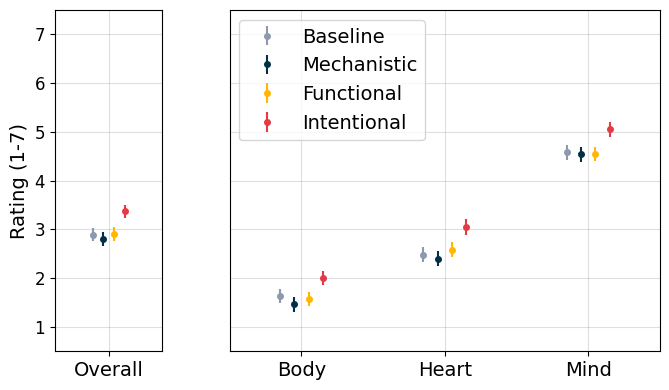

Error bars represent 95% Confidence Intervals


In [4]:
overall_category_save_dir = os.path.join(fig_save_dir, 'body-heart-mind', 'mca_overall_category')
utils.ensure_dir(overall_category_save_dir)

orientation = 'vertical'
marker_size = 4
save = True
font_size_dict = {
    'ylabel': 14,
    'legend': 14,
    'xticklabel': 14,
    'yticklabel': 12
}

R_results_path = os.path.join(R_results_save_dir, '{}_results.txt'.format(categorization_source))

categorization = utils.read_file(categories_path)[categorization_source]


# # groups = list(groupings[grouping_source].keys())

# r_results_path = r_results_path_template.format(grouping_source)
if not os.path.exists(R_results_path):
    raise ValueError("Path to R results file {} does not exist".format(R_results_path))

# Create fig with multiple subplots
fig, axes = plt.subplots(1, 2, sharey=True, gridspec_kw={'width_ratios': [1, 4]}, figsize=(6.8, 4))

# Right plot is means by category
fig, axes[1] = analysis.category_level_pointplot(
    r_results_path=R_results_path,
    grouping_source=categorization_source,
    groups=categorization.keys(),
    conditions=conditions,
    emmeans_graph_save_dir=overall_category_save_dir,
    condition_color_idxs=condition_color_idxs,
    orientation=orientation,
    marker_size=marker_size,
    show_xlabels=False,
    show_ylabels=False,
    label=True,
    show_legend=True,
    title=None,
    fig=fig,
    ax=axes[1],
    font_size_dict=font_size_dict,
    show=False,
    save_path=None)

# Left plot should be the overall means
fig, axes[0] = analysis.overall_pointplot(
    r_results_path=R_results_path,
    grouping_source=categorization_source,
    conditions=conditions,
    emmeans_graph_save_dir=overall_category_save_dir,
    condition_color_idxs=condition_color_idxs,
    orientation=orientation,
    marker_size=marker_size,
    spacing_multiplier=0.2,
    label=True,
    show_xlabel=False,
    show_ylabel=True,
    show_legend=False,
    title=None,
    fig=fig,
    ax=axes[0],
    font_size_dict=font_size_dict,
    save_path=None,
    show=False)

# fig.legend(loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=4)
# fig.suptitle('Mean Mental State Attributions to LLMs')

plt.tight_layout()
plt.subplots_adjust(wspace=0.25)
if save:
    fig_save_path = os.path.join(
        overall_category_save_dir,
        'overall-_{}.{}'.format(categorization_source, save_ext))
    utils.informal_log("Saving graph to {}".format(fig_save_path))
    plt.savefig(fig_save_path, bbox_inches="tight")
plt.show()
print("Error bars represent 95% Confidence Intervals")



### Graph Item Level Point Plots separated by body-heart-mind categories

Saved file to ../../analysis/figures/item_level/item_means.csv
[0426_142808] Saving graph to ../../analysis/figures/item_level/item_level_graph.pdf


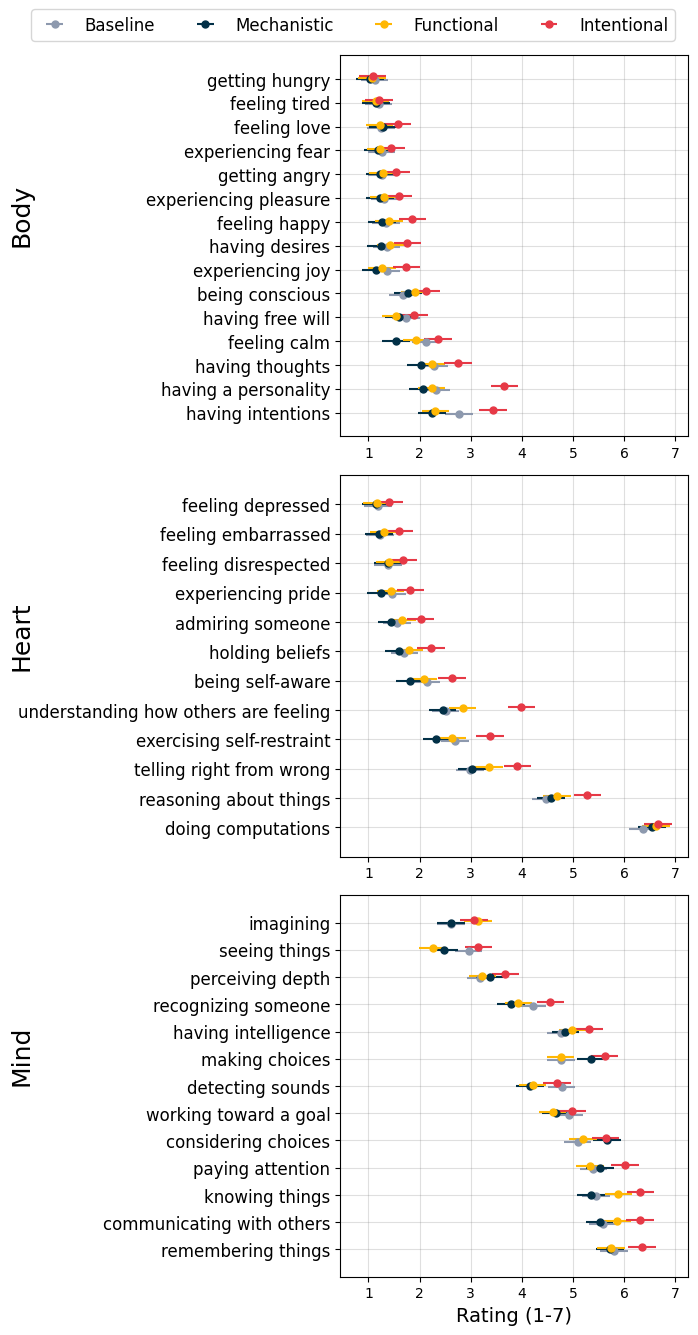

In [5]:
item_level_save_dir = os.path.join(fig_save_dir, 'item_level')
utils.ensure_dir(item_level_save_dir)
save = True

item_level_R_results_path = os.path.join(item_level_R_results_save_dir, 'results.txt')
# category_r_results_path_template = os.path.join(
#     PATH_TO_ROOT, R_results_save_dir, '{}_results.txt')
# grouping_source = 'weisman'

# Read items and make R compatible
items = utils.read_file(items_path)
items = [item.replace(' ', '.') for item in items]


# Get ready to sort DF by group
categorization = utils.read_file(categories_path)[categorization_source]

# Create dictionary mapping item to its group
item_group_dict = {}
for k, vals in categorization.items():
    for val in vals:
        item_group_dict[val] = k
conditions = ["Baseline", "Mechanistic", "Functional", "Intentional"]

# Read item level emmeans
graph_data, df = analysis.read_emmeans_marginalized_result(
    results_path=item_level_R_results_path,
    grouping_source="item_level",
    marginalized_var='item',
    marginalized_var_values=items,
    save_dir=item_level_save_dir,
    overwrite=False
)




pivot_df = analysis._format_and_pivot_emmeans_df(
    emmeans_df=df,
    target_column='item'
)

pivot_df['category'] = pivot_df['item'].apply(lambda x : item_group_dict[x])

categories = categorization.keys()

# Parameters for plotting
font_size_dict = {
    'xlabel': 14,
    'ylabel': 18,
    'legend': 12,
    'title': 14,
    'xticklabel': 10,
    'yticklabel': 12
}
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(7, 13))

for idx, category in enumerate(categories):
    category_df = pivot_df[pivot_df['category'] == category]
    category_df = category_df.sort_values(by=['mean-Baseline'], ascending=False)

    # Extract means and 95% CI errors
    means = category_df[["mean-{}".format(condition) for condition in conditions]].to_numpy().T
    errors = category_df[["ci_error-{}".format(condition) for condition in conditions]].to_numpy().T

    ylim = (-1, len(category_df))
    ytick_labels_list = category_df['item'].to_list()

    fig, axes[idx] = visualizations.pointplot(
        fig=fig,
        ax=axes[idx],
        means=means,
        errors=errors,
        orientation='horizontal',
        labels=conditions if idx == 0 else None,
        show_legend=False,
        ytick_labels=ytick_labels_list,
        xtick_labels=[i for i in range(1, 8)],
        xlabel='Rating (1-7)' if idx == len(categories) - 1 else "",
        ylabel=category.capitalize(),
        ylim=ylim,
        show_grid=True,
        alpha=1.0,
        marker_size=5,
        color_idxs=condition_color_idxs,
        font_size_dict=font_size_dict,
    )

    # Align y-axis label to be the same
    label_x_pos = -0.88
    axes[idx].yaxis.set_label_coords(label_x_pos, 0.58)

    # enable xticks
    axes[idx].tick_params(labelbottom=True)


# Add legend to top
fig.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.03),
    ncol=4,
    fontsize=font_size_dict['legend'] if 'legend' in font_size_dict else None)

if save:
    save_path = os.path.join(item_level_save_dir, 'item_level_graph.{}'.format(save_ext))
    utils.informal_log("Saving graph to {}".format(save_path))
    plt.savefig(save_path, bbox_inches="tight")
plt.show()



## Factor Loading Categories

### Graph ratings overall and using factor loading categories

Saved file to ../../analysis/figures/factor-loading/overall_category/factor_analysis.csv
Saved file to ../../analysis/figures/factor-loading/overall_category/factor_analysis_emmeans_portrayal.csv
[0426_142813] Saving graph to ../../analysis/figures/factor-loading/overall_category/overall_factor_loading.pdf


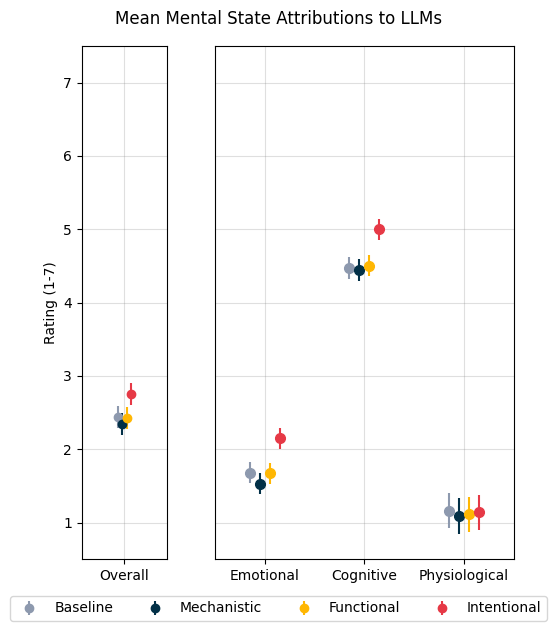

In [6]:
overall_category_save_dir = os.path.join(fig_save_dir, 'factor-loading', 'overall_category')
utils.ensure_dir(overall_category_save_dir)

orientation = 'vertical'
n_factors = 3

# Get path to data
r_results_path = os.path.join(factor_R_results_save_dir, '{}_components_results.txt'.format(n_factors))
if not os.path.exists(r_results_path):
    raise ValueError("Path to R results file {} does not exist".format(r_results_path))
grouping_source = 'factor_analysis'
groups = ['Factor{}'.format(i + 1) for i in range(n_factors)]


# Create fig with multiple subplots
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(5,6), gridspec_kw={'width_ratios': [1, 3.5]})

# Right plot is means by category
fig, axes[1] = analysis.category_level_pointplot(
    r_results_path=r_results_path,
    grouping_source=grouping_source,
    groups=groups,
    conditions=conditions,
    emmeans_graph_save_dir=overall_category_save_dir,
    condition_color_idxs=condition_color_idxs,
    orientation=orientation,
    show_xlabels=False,
    show_ylabels=False,
    label=False,
    marker_size=7,
    show_legend=False,
    title=None,
    fig=fig,
    ax=axes[1],
    show=False,
    save_path=None)

# Re-label X-tick labels
axes[1].set_xticklabels(['Emotional', 'Cognitive', 'Physiological'])
# Left plot should be the overall means
fig, axes[0] = analysis.overall_pointplot(
    r_results_path=r_results_path,
    grouping_source=grouping_source,
    conditions=conditions,
    emmeans_graph_save_dir=overall_category_save_dir,
    condition_color_idxs=condition_color_idxs,
    orientation=orientation,
    label=True,
    show_legend=False,
    show_xlabel=False,
    title=None,
    fig=fig,
    ax=axes[0],
    save_path=None,
    show=False)

fig.legend(loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=4)
fig.suptitle('Mean Mental State Attributions to LLMs')

plt.tight_layout()
plt.subplots_adjust(wspace=0.25)


save_path = os.path.join( overall_category_save_dir, 'overall_factor_loading.{}'.format(save_ext))

utils.informal_log("Saving graph to {}".format(save_path))
plt.savefig(save_path, bbox_inches="tight")
plt.show()



### Graph Overall and the item level, separated by factor groupings

Saved file to ../../analysis/figures/factor-loading/item_level/item_means.csv
Saved file to ../../analysis/figures/factor-loading/item_level/weisman_emmeans_portrayal.csv
[0426_142817] Saving graph to ../../analysis/figures/factor-loading/item_level/item_level_overall_graph.pdf


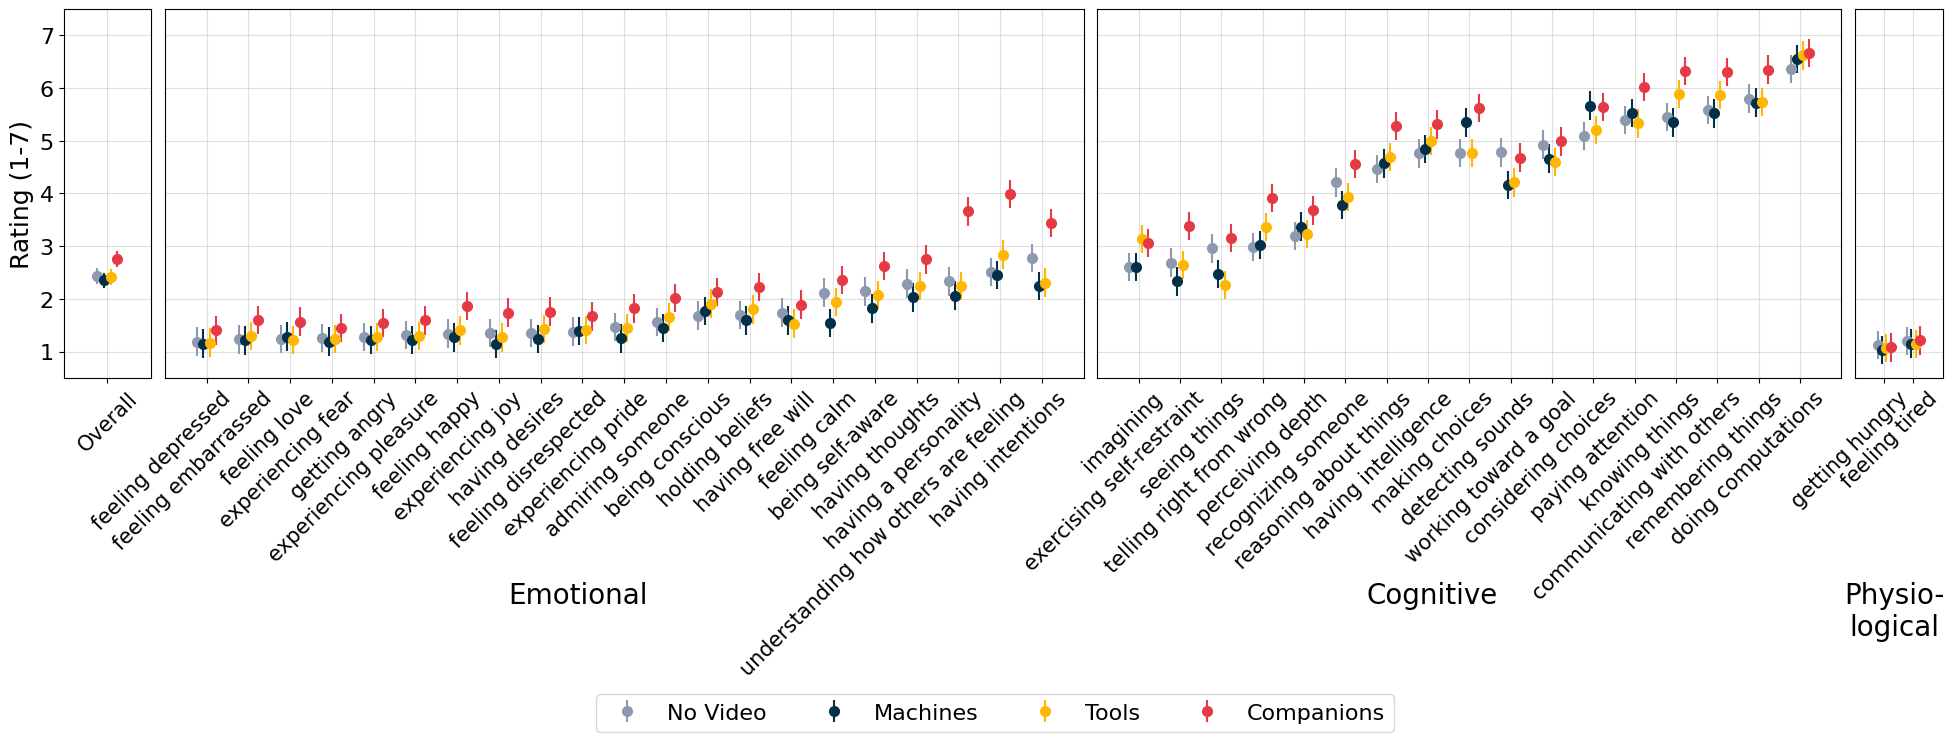

In [7]:
item_level_save_dir = os.path.join(fig_save_dir, 'factor-loading', 'item_level')
utils.ensure_dir(item_level_save_dir)

item_level_R_results_path = os.path.join(item_level_R_results_save_dir, 'results.txt')
grouping_source = 'factor_analysis'

save = True

# Read items and make R compatible
items = utils.read_file(items_path)
items = [item.replace(' ', '.') for item in items]

# Get ready to sort DF by group
categorization = utils.read_file(factor_categories_path)['factor_analysis']
item_group_dict = {}
for k, vals in categorization.items():
    for val in vals:
        item_group_dict[val] = k


conditions = ["Baseline", "Mechanistic", "Functional", "Intentional"]

# Extract graph data from EMMeans outputs & pivot data
graph_data, df = analysis.read_emmeans_marginalized_result(
    results_path=item_level_R_results_path,
    grouping_source="item_level",
    marginalized_var='item',
    marginalized_var_values=items,
    save_dir=item_level_save_dir,
    overwrite=True
)
pivot_df = analysis._format_and_pivot_emmeans_df(
    emmeans_df=df,
    target_column='item'
)

# Get data to make boxes proportional to number of items
pivot_df['category'] = pivot_df['item'].apply(lambda x : item_group_dict[x])
categories  = categorization.keys()
label_categories = ['Emotional', 'Cognitive', 'Physio-\nlogical']
n_items_per_group = [len(categorization[key]) for key in ['Factor1', 'Factor2', 'Factor3']]
n_items_per_group = [2] + n_items_per_group

# Make subplot
fig, axes = plt.subplots(1, 4,
                         sharey=True,
                         figsize=(20, 7),
                         gridspec_kw={'width_ratios': n_items_per_group})

# Labeling & visuals parameters
legend_labels = ['No Video', 'Machines', 'Tools', 'Companions']
font_size_dict = {
    'xlabel': 20,
    'ylabel': 18,
    'legend': 16,
    'title': 18,
    'xticklabel': 15,
    'yticklabel': 16
}
marker_size = 7
spacing_multiplier = 0.15

# First make overall plot
r_results_path = os.path.join(factor_R_results_save_dir, '{}_components_results.txt'.format(n_factors))
fig, axes[0] = analysis.overall_pointplot(
    r_results_path=r_results_path,
    grouping_source='weisman',
    conditions=conditions,
    label=False,
    emmeans_graph_save_dir=item_level_save_dir,
    condition_color_idxs=condition_color_idxs,
    orientation='vertical',
    show_xlabel=False,
    show_legend=False,
    save_path=None,
    font_size_dict=font_size_dict,
    marker_size=marker_size,
    spacing_multiplier=spacing_multiplier,
    fig=fig,
    ax=axes[0]
)
# Label Overall plot
for label in axes[0].get_xticklabels():
    label.set_rotation(45)  # Rotate labels
    label.set_horizontalalignment('right')  # Align to the right
    label.set_transform(label.get_transform() + transforms.ScaledTranslation(25 / 72, 0, fig.dpi_scale_trans))

# Item level plots for each factor
for idx, category in enumerate(categories):
    # Extract means and confidence intervals
    category_df = pivot_df[pivot_df['category'] == category]
    category_df = category_df.sort_values(by=['mean-Baseline'], ascending=True)
    means = category_df[["mean-{}".format(condition) for condition in conditions]].to_numpy().T
    errors = category_df[["ci_error-{}".format(condition) for condition in conditions]].to_numpy().T

    # Plot
    xlim = (-1, len(category_df))
    xtick_labels_list = category_df['item'].to_list()
    fig, axes[idx + 1] = visualizations.pointplot(
        fig=fig,
        ax=axes[idx + 1],
        means=means,
        errors=errors,
        orientation='vertical',
        labels=legend_labels if idx + 1 == 1 else None,
        show_legend=False, #True if idx == 0 else False,
        legend_loc='upper left',
        xtick_labels=xtick_labels_list,
        ytick_labels=[i for i in range(1, 8)],
        yticks=[i for i in range(1, 8)],
        ylim=(0.5, 7.5),
        ylabel='Rating (1-7)' if idx + 1 == 0 else "",
        xlabel=label_categories[idx],
        xlim=xlim,
        show_grid=True,
        alpha=1.0,
        marker_size=marker_size,
        spacing_multiplier=spacing_multiplier,
        color_idxs=condition_color_idxs,
        font_size_dict=font_size_dict,
    )

    # Label x axis
    for label in axes[idx + 1].get_xticklabels():
        label.set_rotation(45)  # Rotate labels
        label.set_horizontalalignment('right')  # Align to the right
        label.set_transform(label.get_transform() + transforms.ScaledTranslation(20 / 72, 0, fig.dpi_scale_trans))
    # Align x-axis label to be the same
    axes[idx + 1].xaxis.set_label_coords(0.45, -0.55)

    # Remove y-axis ticks from center and right plots
    if idx + 1 != 0:
        # enable xticks
        axes[idx + 1].tick_params(axis='y', left=False)

# Adjust spacing and add legend
plt.subplots_adjust(wspace=0.03)
fig.legend(loc='lower center', bbox_to_anchor=(0.5, -0.07), ncol=4, fontsize=font_size_dict['legend'])

if save:
    save_path = os.path.join(item_level_save_dir, 'item_level_overall_graph.{}'.format(save_ext))
    utils.informal_log("Saving graph to {}".format(save_path))
    plt.savefig(save_path, bbox_inches="tight")

## Plot attitudes

Note: in Cogsci version, we only reported anthropomorphism

[0426_142823] Saving graph to ../../analysis/figures/attitudes/attitudes_graph.pdf


<Figure size 640x480 with 0 Axes>

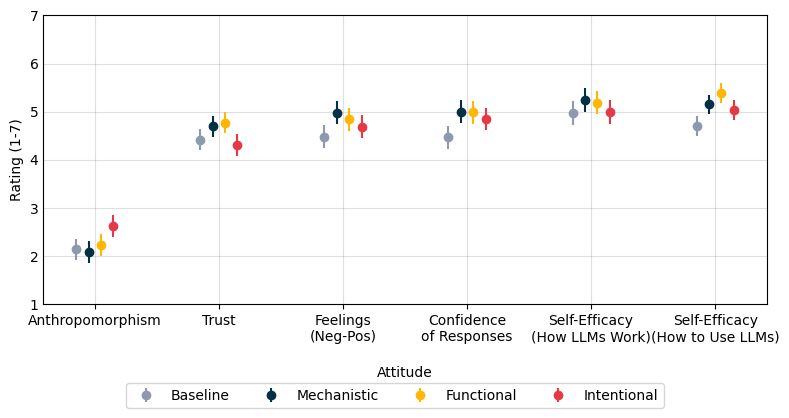

In [8]:
attitudes_save_dir = os.path.join(fig_save_dir, 'attitudes')
utils.ensure_dir(attitudes_save_dir)

# plot_type = 'pointplot'
# letter_labels = True

attitude_labels = {
    'humanness': 'Anthropomorphism',
    'trust': 'Trust',
    'feeling': 'Feelings\n(Neg-Pos)',
    'confidence': 'Confidence\nof Responses',
    'se_how': 'Self-Efficacy\n(How LLMs Work)\n ',
    'se_use': 'Self-Efficacy\n(How to Use LLMs)'
}
# if not letter_labels:
#     attitude_labels = {
#         'anthro': 'Anthropomorphism',
#         'trust': 'Trust',
#         'general': 'Feelings\n(Neg-Pos)',
#         'confidence': 'Confidence\nof Responses',
#         'se_how': 'Self-Efficacy\n(How LLMs Work)\n ',
#         'se_use': 'Self-Efficacy\n(How to Use LLMs)'
#     }
# else:
#     attitude_labels = {
#         'anthro': 'Anthro-\npomorphism\n\n(a)',
#         'trust': 'Trust\n\n\n(b)',
#         'general': 'General\nAttitude\n\n(c)',
#         'confidence': 'Confidence\nof Responses\n\n(d)',
#         'se_how': 'Self-Efficacy\n(How LLMs Work)\n\n(e)\n',
#         'se_use': 'Self-Efficacy\n(How to\nUse LLMs)\n(f)',

#         }


attitudes = attitude_labels.keys()

means = []
errors = []

for attitude in attitudes:
    results_path = os.path.join(attitudes_R_results_save_dir, '{}_results.txt'.format(attitude))

    graph_data, emmeans_df = analysis.read_emmeans_single_variable(
        results_path=results_path,
        grouping_source=attitude,
        variable_name='portrayal'
    )

    attitude_means = list(np.array(graph_data['means']).squeeze())
    attitude_errors = list(np.array(graph_data['errors']).squeeze())
    means.append(attitude_means)
    errors.append(attitude_errors)

means = np.array(means).T
errors = np.array(errors).T
fig, ax = visualizations.pointplot(
    means=means,
    errors=errors,
    color_idxs=condition_color_idxs,
    labels=conditions,
    show_legend=False,
    orientation='vertical',
    xlabel='Attitude',
    xtick_labels=[attitude_labels[attitude] for attitude in attitudes],
    ylim=[1, 7],
    ylabel='Rating (1-7)',
    # title='Mean Ratings of Additional Beliefs Across Conditions',
    show_grid=True,
    fig_size=(8, 4),
    show=False
)
# Add Legend outside of plot
fig.legend(loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=4)
plt.tight_layout()

save_path = os.path.join(attitudes_save_dir, 'attitudes_graph.{}'.format(save_ext))
utils.informal_log("Saving graph to {}".format(save_path))

plt.savefig(save_path, bbox_inches='tight')
plt.show()



### Plot Mentioned vs Unmentioned Analysis Results (reported but no corresponding figure in Cogsci version)

Saved file to ../../analysis/figures/mentioned_unmentioned/mentioned.csv
[0426_142849] Saving figure to ../../analysis/figures/mentioned_unmentioned/mentioned.pdf


<Figure size 640x480 with 0 Axes>

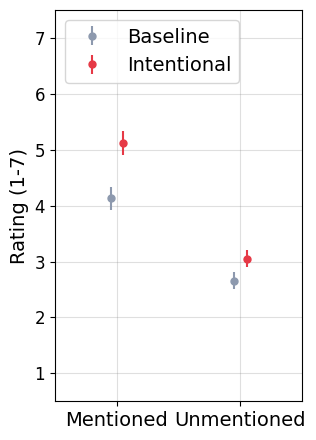

In [10]:
condition = "intentional"
# plot_type = "pointplot"
orientation = "vertical"
temp_conditions = ["Baseline", "Intentional"]
label_conditions = ["Baseline", "Intentional"]
mentioned_R_results_save_dir = os.path.join(analysis_dir, 'exploratory', 'mentioned_analysis', 'R', 'results')
mentioned_fig_save_dir = os.path.join(fig_save_dir, 'mentioned_unmentioned')
utils.ensure_dir(mentioned_fig_save_dir)

save = True

semantic_groupings_path = os.path.join(PATH_TO_ROOT, 'data', 'files', 'alluded_groupings.json')
semantic_R_results_path = os.path.join(mentioned_R_results_save_dir, 'results.txt')

semantic_groupings = utils.read_file(semantic_groupings_path)
groups = list(semantic_groupings[condition].keys())

if not os.path.exists(semantic_R_results_path):
    raise ValueError("Path to R results file {} does not exist".format(semantic_R_results_path))


# Extract and format data to get means and 95% CI's
emmeans_graph_data, emmeans_df = analysis.read_emmeans_marginalized_result(
    results_path=semantic_R_results_path,
    grouping_source="mentioned",
    conditions=temp_conditions,
    marginalized_var='category',
    marginalized_var_values=groups,
    save_dir=mentioned_fig_save_dir if save else None,
    overwrite=True
)
pivot_df = analysis._format_and_pivot_emmeans_df(
    emmeans_df=emmeans_df,
    target_column='category'
)
means = pivot_df[["mean-{}".format(condition) for condition in temp_conditions]].to_numpy().T
errors = pivot_df[["ci_error-{}".format(condition) for condition in temp_conditions]].to_numpy().T
labels = label_conditions

# Parameters for figure formatting
font_size_dict = {
    'ylabel': 14,
    # 'xlabel': 14,
    'legend': 14,
    'xticklabel': 14,
    'yticklabel': 12
}
# title = 'Mental State Attributions of LLMs of\nMentioned vs Unmentioned Items'
xtick_labels = [label.capitalize() for label in pivot_df['category'].to_list()]
xlabel = None
ytick_labels = [i for i in range(1, 8)]
ylabel = 'Rating (1-7)'
fig_size = (3.25, 4.5)
xlim = (-0.5, 1.5)
ylim = [0.5, 7.5]

fig_save_path = os.path.join(
    mentioned_fig_save_dir,
    'mentioned.{}'.format(save_ext))

fig, ax = visualizations.pointplot(
    means=means,
    errors=errors,
    orientation=orientation,
    labels=labels,
    ytick_labels=ytick_labels,
    yticks=ytick_labels,
    xtick_labels=xtick_labels,
    xlabel=xlabel,
    ylabel=ylabel,
    ylim=ylim,
    xlim=xlim,
    legend_loc='upper left',
    fig_size=fig_size,
    color_idxs=[7, 4],
    marker_size=5,
    show_grid=True,
    save_path=fig_save_path if save else None,
    font_size_dict=font_size_dict,
    spacing_multiplier=0.1,
    show=True)
